<small><i>May 2014 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol). Source and license info are in the folder.</i></small>

# PART 2: Learning concepts and theory

# 1. What is learning?

Let us recall the two basic values defined in the last notebook. We talk about *training error* or *in-sample error*, $E_{\text{in}}$, referring to the error measured over all the observed data samples in the training set. We talk about *testing error* or *generalization error*, $E_{\text{out}}$, as the expected error on unseen data. 

We can empirically estimate the generalization error by means of cross-validation techniques and observe that

$$E_{\text{out}} \geq E_{\text{in}}.$$

The goal of learning is to minimize the generalization error, but how can we guarantee this minimization only using training data?

From the above inequality it is easy to derive a couple of very intuitive ideas:

+ Because $E_{\text{out}}$ is greater than or equal to $E_{\text{in}}$, it is desirable to have $$E_{\text{in}} \rightarrow 0.$$

+ Additionally, we also want the training error behavior to track the generalization error, i.e. $$E_{\text{out}}\approx E_{\text{in}}.$$

We can rewrite this second condition as 
$$E_{\text{in}} \leq E_{\text{out}} \leq E_{\text{in}} + \Omega,$$
with $\Omega \rightarrow 0$.

## Probably approximately correct learning (aka PAC learning). 

We would like to characterize $\Omega$ in terms of our problem parameters, i.e. number of samples ($N$), dimensionality of the problem ($d$), etc. 

Statistic analysis offers an interesting characterization of this quantity 

$$E_{\text{out}} \leq E_{\text{in}} + \mathcal{O}\big(\sqrt{\frac{\log{C}}{N}}\big),$$

where $C$ is a measure of complexity of the model class we are using. Technically, we may refer to this model class also as the hypothesis space.

<div class = "alert alert-success">**QUIZ:** 
<li> Which will be the effect of having a large number of data? 
<li> Will selecting a model with small complexity reduce the out of sample error?
</div>

Before going further in this matter let us open the box of the learning process and observe which parts it is composed of.

# 2. Inside the learning process

Consider a simple two dimensional problem.

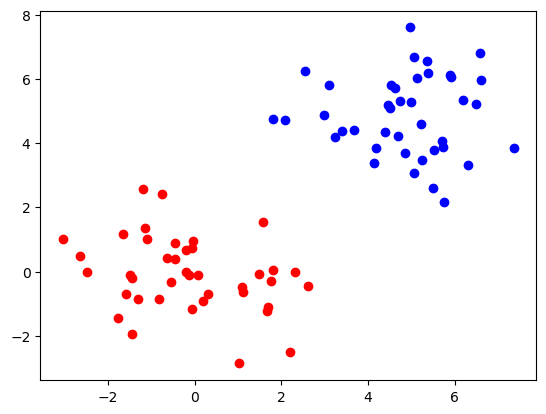

In [2]:
%matplotlib inline
#from sklearn import 
import numpy as np
#Create some data
X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])

#Visualize
import matplotlib.pyplot as plt
plt.scatter(X[0:40,0],X[0:40,1],color='r')
plt.scatter(X[40:,0],X[40:,1],color='b')
plt.show()

In order to be able to learn, any algorithm has to define at least three components:

+ **The model class/hypothesis space** defines the family of mathematical models that will be used. The target decision boundary will be approximated from one element of this space. For example, we can consider the class of linear models. In this case our decision boundary will be a line if the problem is defined in ${\bf R}^2$ and the model class is the space of all posible lines in ${\bf R}^2$. 

    Model classes define the geometric properties of the decision function. There are different taxonomies but the most well-known are the *families* of **linear** and **non-linear** models. These families usually depend on some parameters. And the solution to a learning problem is the selection of a particular set of parameters, i.e. the selection of an instance model from the model class space. The model class space is also called **hypothesis space**.

    The selection of the best model will depend on our problem and what we want to obtain from the problem. The primary goal in learning is usually achieving the minimum error/maximum performance. But according to what else we want from the algorithm we will find different algorithms. Other common desirable properties are interpretability, behavior in front of missing data, fast training, etc.


+ **The problem model** formalizes and encodes the desired properties of the solution. In many cases this formalization takes the form of an optimization problem. In it most basic instantiation, the problem model can be the **minimization of an error function**. The error function measures the difference between our model and the target one. Informally speaking, in a classification problem it measures how "irritated" we are when our model misses the right label of a training sample. For example, in classification the ideal error function is the **0-1 loss**. This function takes value $1$ when we incorrectly classify a training sample and zero otherwise. In this case, it can be intrepreted that one is only irritated by "one unit of irritation" when one sample is misclassified.

    Problem model can also be used to impose other constraints on our solution, such as finding a smooth approximation, small complexity model, sparse solution, etc.
    
    
+ **The learning algorithm** is an optimization/search method or algorithm that given a model class fits it to the training data according to the error function. According to the nature of our problem there are many different algorithms. In general, we are talking about finding the minimum error approximation or maximum probable model. In those cases, if the problem is convex/quasi-convex we will typically use first or second order methods (i.e. gradient descent, coordinate descent, Newton's method, Interior Point methods, etc). Other searching techniques such as genetic algorithms or monte-carlo techniques can be used if we do not have access to the derivatives of the objective function.


Let us use the "human machine learning" algorithm. You move the parameters until you feel the solution is correct.

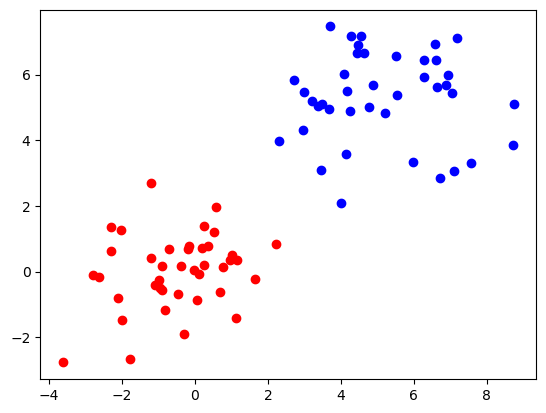

interactive(children=(FloatSlider(value=0.0, description='w0', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

In [ ]:
%matplotlib inline
#from sklearn import 
import numpy as np
#Create some data
X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])

#Visualize
import matplotlib.pyplot as plt
from ipywidgets import interact

def human_learning_algorithm(X,y):
    
    plt.scatter(X[0:40,0],X[0:40,1],color='r')
    plt.scatter(X[40:,0],X[40:,1],color='b')
    #plt.scatter(X[0:40,0],X[0:40,1],color='r')
    #plt.scatter(X[40:,0],X[40:,1],color='b')    
    delta = 0.025
    xx = np.arange(-5.0, 10.0, delta)
    yy = np.arange(-5.0, 10.0, delta)
    XX, YY = np.meshgrid(xx, yy)
    Xf = XX.flatten()
    Yf = YY.flatten()
    sz=XX.shape
    data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);

    def hml_display(w0,w1,offset):
        w=np.array([w0,w1])
        w.shape=(2,1)
        #Evaluate the model for a given weight
        Z = data.dot(w)+offset
        Z.shape=sz
        plt.scatter(X[0:40,0],X[0:40,1],color='r')
        plt.scatter(X[40:,0],X[40:,1],color='b')
        plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,10,-5,10),alpha=0.3, vmin=-15, vmax=15)
        plt.contour(XX,YY,Z,[0])
        fig = plt.gcf()
        fig.set_size_inches(9,9)
        plt.show()
   
    #Ipython 2.0      
    interact(hml_display, w0=(-10.,10.), w1=(-10.,10.), offset=(-20.,40.));
    #Ipython 1.1 back compatibility
    #w0=-10. #-10.,10.
    #w1=-10. #-10.,10.
    #offset=-20. #-20.,40.
    #hml_display(w0,w1,offset) 

    
human_learning_algorithm(X,y)



<div class = "alert alert-success">**QUESTION:** Describe the process you used for fitting the classifier
</div>

<div class = "alert alert-info">**Some notes on the learning process**
<p>
The main goal of any learning process is to achive the maximum predictive power (*accuracy*). This is minimize the error. However, there are three other important properties we usually desire our models to have:

<p>
<li> **Simplicity** - how much fiddling do we need for the method to work? Can I modify it to handle the particularities of my problem?
<li> **Speed** - How long does it take to train a reliable model? (training time) Can I use it in embedded and real time applications? (testing time), How long do I have to wait for processing my 1YB (yottabyte - 1e24 Bytes) dataset?
<li> **Interpretability** - Why did it make these predictions?

<p>
It happens that accuracy trades off with all the rest of the desirable properties. 
</div>

# 3. Learning curves and overfitting.

Let us go back to PAC (Probably Approximately Correct) learnability.

In [5]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn import neighbors

MAXC=50
MAXN=3000
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
y = np.concatenate([y,np.ones((MAXN,1))])
perm = np.random.permutation(y.size)
X = X[perm,:]
y = y[perm]


def complexity_number(C,N):
    
    Xr=X[:N,:]
    yr=y[:N]
    idxplus = yr==1
    idxminus = yr==-1
    idxplus = idxplus.flatten()
    idxminus = idxminus.flatten()
    plt.scatter(Xr[idxplus,0],Xr[idxplus,1],color='r')
    plt.scatter(Xr[idxminus,0],Xr[idxminus,1],color='b')   
    delta = 0.05
    xx = np.arange(-5.0, 15.0, delta)
    yy = np.arange(-5.0, 15.0, delta)
    XX, YY = np.meshgrid(xx, yy)
    Xf = XX.flatten()
    Yf = YY.flatten()
    sz=XX.shape
    data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);
    #Evaluate the model for a given weight
    clf = neighbors.KNeighborsClassifier(MAXC-C+1)
    clf.fit(Xr,yr.ravel())
    Z=clf.predict(data)
    Z.shape=sz
    plt.scatter(Xr[idxplus,0],Xr[idxplus,1],color='r')
    plt.scatter(Xr[idxminus,0],Xr[idxminus,1],color='b')
    plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
    plt.contour(XX,YY,Z,[0])
    fig = plt.gcf()
    fig.set_size_inches(9,9)
    plt.show()
   
#Ipython 2.0
interact(complexity_number,  C=(1,MAXC), N = (20,MAXN));
#Ipython 1.1.
#C=1 #1...50
#N = 20 #20...1000
#complexity_number(C,N)

interactive(children=(IntSlider(value=25, description='C', max=50, min=1), IntSlider(value=1510, description='…

<div class = "alert alert-success">**EXERCISE: ** 
<li> Set the number of data samples per cluster $N$ to $100$ and the complexity value $C$ to $50$. Describe what you observe: Does the method missclassify any data sample? 
<li> Decrease the complexity value to $C = 20$. Describe the boundary: Does the method missclassify any data sample?
<li> Which of the two settings do you think will perform the best in front of new data from the same distribution? Why?
<li> Increase the number of data points to $N = 1000$ with $C=50$. Describe what you observe. Will the method perform better than the same method with $N=100$?
</div>

## 3.1 Learning curves.

Let us visualize the behavior observed. For this purpose we may draw a curve of the training error and test error as the number of training data increases for a given complexity. This curve is called **learning curve**.

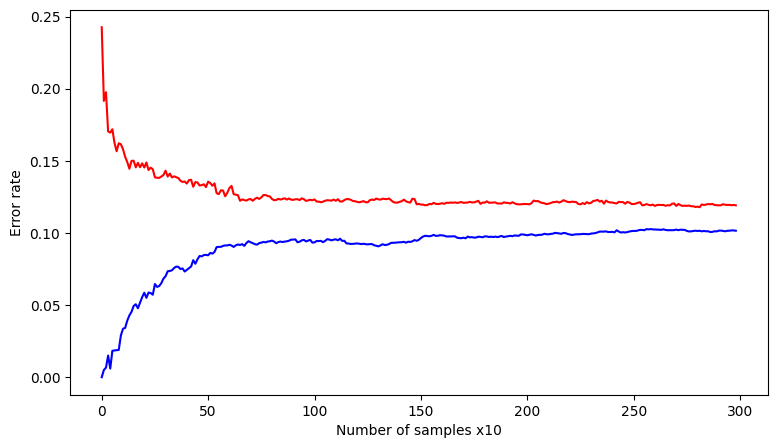

In [3]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree

C=5
MAXN=1000

yhat_test=np.zeros((10,299,2))
yhat_train=np.zeros((10,299,2))
#Repeat ten times to get smooth curves
for i in range(10):
    X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
    y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y = np.concatenate([y,np.ones((MAXN,1))])
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    X_test = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X_test = np.concatenate([X_test,[8,5]+1.5*np.random.randn(MAXN,2)])
    y_test = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y_test = np.concatenate([y_test,np.ones((MAXN,1))])
    j=0
    for N in range(10,3000,10):
        Xr=X[:N,:]
        yr=y[:N]
        idxplus = yr==1
        idxminus = yr==-1
        idxplus = idxplus.flatten()
        idxminus = idxminus.flatten()
        #Evaluate the model
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(Xr,yr.ravel())
        yhat_test[i,j,0] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        yhat_train[i,j,0] = 1. - metrics.accuracy_score(clf.predict(Xr), yr.ravel())
        j=j+1

plt.plot(np.mean(yhat_test[:,:,0].T,axis=1),'r')
plt.plot(np.mean(yhat_train[:,:,0].T,axis=1),'b')
fig = plt.gcf()
fig.set_size_inches(9,5)
plt.xlabel('Number of samples x10')
plt.ylabel('Error rate')
plt.show()

Observing the former plot we can see:

+ As the number of training samples increase both errors tends to the same value, **bias**.
+ When we have a little amount of training data, training error is very small but test error is very large.

Check now the learning curve when the complexity is smaller.

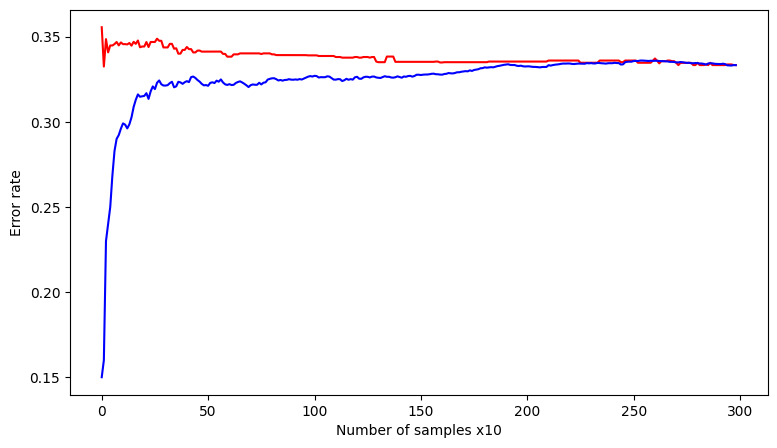

In [5]:


C=1
MAXN=1000

#Repeat ten times to get smooth curves
for i in range(10):
    X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
    y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y = np.concatenate([y,np.ones((MAXN,1))])
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    X_test = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X_test = np.concatenate([X_test,[8,5]+1.5*np.random.randn(MAXN,2)])
    y_test = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y_test = np.concatenate([y_test,np.ones((MAXN,1))])
    j=0
    for N in range(10,3000,10):
        Xr=X[:N,:]
        yr=y[:N]
        idxplus = yr==1
        idxminus = yr==-1
        idxplus = idxplus.flatten()
        idxminus = idxminus.flatten()
        #Evaluate the model
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(Xr,yr.ravel())
        yhat_test[i,j,1] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        yhat_train[i,j,1] = 1. - metrics.accuracy_score(clf.predict(Xr), yr.ravel())
        j=j+1

plt.plot(np.mean(yhat_test[:,:,1].T,axis=1),'r')
plt.plot(np.mean(yhat_train[:,:,1].T,axis=1),'b')
fig = plt.gcf()
fig.set_size_inches(9,5)
plt.xlabel('Number of samples x10')
plt.ylabel('Error rate')
plt.show()

We can see a similar behavior in this second curve. Let us compare the two plots.

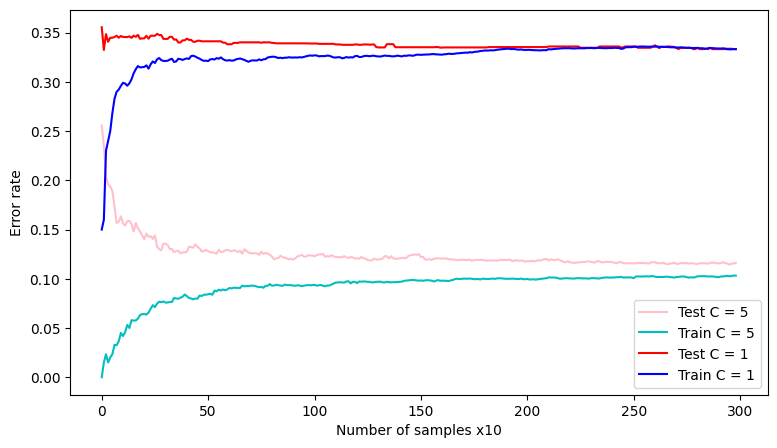

In [6]:
p1,=plt.plot(np.mean(yhat_test[:,:,0].T,axis=1),color='pink')
p2,=plt.plot(np.mean(yhat_train[:,:,0].T,axis=1),'c')
p3,=plt.plot(np.mean(yhat_test[:,:,1].T,axis=1),'r')
p4,=plt.plot(np.mean(yhat_train[:,:,1].T,axis=1),'b')
fig = plt.gcf()
fig.set_size_inches(9,5)
plt.xlabel('Number of samples x10')
plt.ylabel('Error rate')
plt.legend([p1,p2,p3,p4],["Test C = 5","Train C = 5","Test C = 1","Train C = 1"])
plt.show()

Although both show a similar behavior we note several differences:

+ With small complexity training and test errors converge sooner/with a smaller amount of data.
+ However, with small complexity, the error of converge is larger than with increased complexity.

>The value towards both errors converge is also called **bias**, and the difference between this value and the test error is called **variance**. The **bias/variance** decomposition of the learning curve is an alternative view to the training and generalization view.

## 3.2 Overfitting.

Let us now plot the learning behavior for a fixed number of examples with respect to the complexity of the model.

<div class = "alert alert-success">**QUESTION: ** What do you expect to happen?
</div>

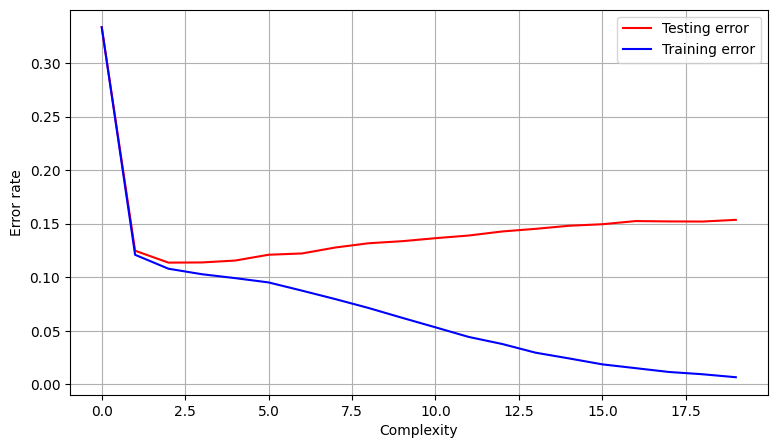

In [7]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree

MAXC=20
N=1000
NTEST=4000
ITERS=3

yhat_test=np.zeros((ITERS,MAXC,2))
yhat_train=np.zeros((ITERS,MAXC,2))
#Repeat ten times to get smooth curves
for i in range(ITERS):
    X = np.concatenate([1.25*np.random.randn(N,2),5+1.5*np.random.randn(N,2)]) 
    X = np.concatenate([X,[8,5]+1.5*np.random.randn(N,2)])
    y = np.concatenate([np.ones((N,1)),-np.ones((N,1))])
    y = np.concatenate([y,np.ones((N,1))])
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    X_test = np.concatenate([1.25*np.random.randn(NTEST,2),5+1.5*np.random.randn(NTEST,2)]) 
    X_test = np.concatenate([X_test,[8,5]+1.5*np.random.randn(NTEST,2)])
    y_test = np.concatenate([np.ones((NTEST,1)),-np.ones((NTEST,1))])
    y_test = np.concatenate([y_test,np.ones((NTEST,1))])
    
    idxplus = y==1
    idxminus = y==-1
    idxplus = idxplus.flatten()
    idxminus = idxminus.flatten()
    j=0
    for C in range(1,MAXC+1):
        #Evaluate the model
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(X,y.ravel())
        yhat_test[i,j,0] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        yhat_train[i,j,0] = 1. - metrics.accuracy_score(clf.predict(X), y.ravel())
        j=j+1

p1, = plt.plot(np.mean(yhat_test[:,:,0].T,axis=1),'r')
p2, = plt.plot(np.mean(yhat_train[:,:,0].T,axis=1),'b')
fig = plt.gcf()
fig.set_size_inches(9,5)
plt.xlabel('Complexity')
plt.ylabel('Error rate')
plt.legend([p1, p2], ["Testing error", "Training error"])
plt.grid(True)
plt.show()

Observe that as the complexity increases the training error is reduced but above a certain complexity level the test error increases. This effect is called **overfitting**.

<div class = "alert alert-success">**QUESTION: ** Let us go back to regression problems. Consider that we know the underlying model generating data samples. For example, data is generated by a 10th order polynomial. Mark all the correct answers:

<li> I will use a 10th order polynomial as my model.
<li> I will use a 2nd order polynomial as my model.
<li> If I have a small number of data I have to use a small order polynomial.
<li> If I have a large amount of data I may use a tenth order polynomial.
</div>

# 4. Cures to overfitting.

We may find three cures to overfitting:

+ Observe that models are usually parameterized by some hyper-parameters. Selecting the complexity is usually governed by some of such parameters. Thus we are in front of a model selection problem. A good heuristic for selecting the model is to choose the value of the hyperparameters that yield the smallest estimated testing error. Remember that this can be done using **cross-validation**.

+ We may also change the formulation of the objective function to penalize complex models. This is called **regularization**.

+ We may use **ensembles**.

## 4.1 Cure I: Use model selection.

We have seen model selection before when we wanted to compare the performance of different classifiers. In that case, our best bet was to select the classifier with the smallest ${E}_{\text{out}}$. 

> **IDEA:** Analogous to model selection we may think of selecting the best hyper-parameters as choosing the classifier with parameters that performs the best. Thus, we may select a set of hyper-parameter values and use cross-validation to select the best configuration.

The process of selecting the best hyper-parameters is called **validation**. 

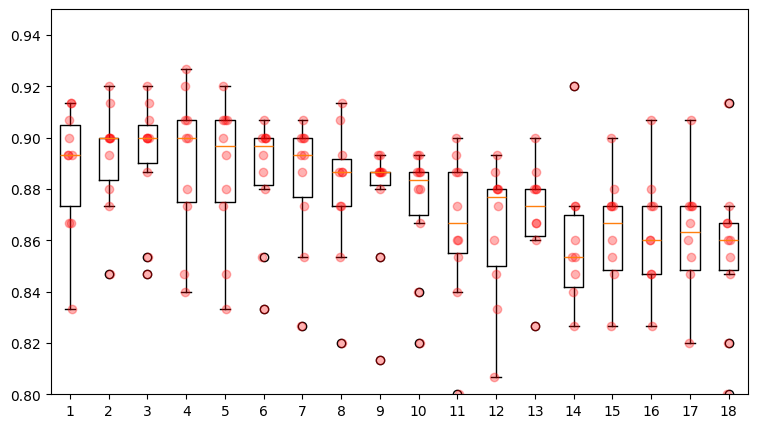

In [9]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn import model_selection

#Create a toy problem
N=500
X = np.concatenate([1.25*np.random.randn(N,2),5+1.5*np.random.randn(N,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(N,2)])
y = np.concatenate([np.ones((N,1)),-np.ones((N,1))])
y = np.concatenate([y,np.ones((N,1))])

#Create a 10-fold cross validation set
kf=model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
kf.get_n_splits()
      
#Search the parameter among the following
C=np.arange(2,20)

acc = np.zeros((10,18))
i=0
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    j=0
    for c in C:
        dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=c)
        dt.fit(X_train,y_train)
        yhat = dt.predict(X_val)
        acc[i][j] = metrics.accuracy_score(yhat, y_val)
        j=j+1
    i=i+1
    
plt.boxplot(acc);
for i in range(18):
    xderiv = (i+1)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc[:,i],'ro',alpha=0.3)


plt.ylim((0.80,0.95))
fig = plt.gcf()
fig.set_size_inches(9,5)
plt.show()

In [10]:
macc= np.mean(acc,axis=0)
idx=np.argmax(macc)
print ('Complexity: ' + str(idx+1) + ' with accuracy: ' + str(macc[idx]) )


Complexity: 3 with accuracy: 0.8926666666666667


What is the generalization error expected by selecting this method?

In [11]:
dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=idx+1)
dt.fit(X_train,y_train)

N=1000
#Let us check it out by generating out of sample data
X_test = np.concatenate([1.25*np.random.randn(N,2),5+1.5*np.random.randn(N,2)]) 
X_test = np.concatenate([X_test,[8,5]+1.5*np.random.randn(N,2)])
y_test = np.concatenate([np.ones((N,1)),-np.ones((N,1))])
y_test = np.concatenate([y_test,np.ones((N,1))])

yhat = dt.predict(X_test)
print (metrics.accuracy_score(yhat, y_test))


0.8756666666666667


### 4.1.1 Train, Test and Validation.

As we have seen the process of assessing the performance of the classifier by estimating the generalization error is called testing. And the process of selecting a model using the estimation of the generalization error is called validation. There is a subtle but critical difference in both and we have to be aware of it when dealing with our problem. 

+ Testing data is used only for assessing performance and will never be used in the learning process.
+ Validation data is used to explicitly select the parameter with best performance according to an estimation of the generalization error. This is a form of learning. 
+ Training data is used for learning the model instance from a model class.

In practice, we are given just training data, and in the most general case we have to explicitly tune some hyper-paramter. Thus, how do we select the different splits?

It will depend on the questions about the method we want to answer:

+ Let us say that our customer ask us to hand her a classifier for a given problem. If we just want to give him the best model then we may use cross-validation on our training data set and select the best performant model. In this scenario, when we return the trained classifier to our customer, we know that it is the one that achieves the best performance. But if the customer asks about the expected performance we can not say anything.

> **A practical issue:** once selected the model we use the complete training set to train the final model.

+ If we want to know the performance of our model we have to use unseen data. Thus, we may proceed in the following way:

    + Split the training set in training and testing data. For example, use $30\%$ of the training set for testing purposes. This data is hold out and will only be used to assess the performance of the method.

    + Use the remanining training data for selecting the hyper-parameters by means of cross-validation.
    
    + Train the model with the selected parameter and assess the performance using the testing data set.

> **A practical issue:** Observe that by splitting in three sets the classifier is trained with a smaller fraction of the data.

+ If we want to make a good comparison of classifiers but we do not care about the best parameters, we may use nested cross-validation. The external cross-validation is used for assessing the performance of the classifier and in each loop of the external cross-validation another cross-validation is run with the remaining training set for selecting the best parameters.

## 4.2 Cure II: Use regularization.

Regularization accounts for estimating the value of $\Omega$ in our out-of-sample inequality. In other words, it models the complexity of the technique. This usually becomes implicit in the algorithm but has huge consequences in real applications. There are two kinds of standard regularization strategies:

+ L2 regularization: Intuitively, L2 regularization is in many cases a surrogate of the notion of smoothness. In this sense, low complexity means smooth models.

+ L1 regularization: L1 regularization force sparse solution. This is useful for interpretability or when the number of parameters is so large that we only want a few active ones for computational issues. 

Although they are used to deal with overfitting, they trade-off with the error function in the objective and are governed by a hyper-parameter. Thus, we still have to select this parameter by means of model selection.

The repeated process for a more robust estimation of the performance measures is one particular form of a general model selection technique called **cross-validation**. There are other kinds of cross-validation, such as **leave-one-out** or **K-fold cross-validation**. 

+ In leave-one-out, given $N$ samples the model is trained with $N-1$ samples and tested with the remaining one. This is repeated $N$ times, once per training sample and the result is averaged. 

+ In K-fold cross-validation the training set is divided in K non-overlapping splits. K-1 splits are used for training and the remaining one used for assessing the mean. This process is repeated $K$ times leaving one split out each time. The results are averaged. We can compute an approximation to the confidence interval using this method.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

from ipywidgets import interact  # <- for interactivity

# data
np.random.seed(42)

n_samples = 30
X = np.random.uniform(0, 1, size=(n_samples, 1))

def f(x):
    return np.sin(2 * np.pi * x)

y = f(X).ravel() + 0.3 * np.random.randn(n_samples)

# fit a polynomial
degree = 15
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)

ols = LinearRegression() # OLS (Ordinary Least Squares)
ols.fit(X_poly, y)

alphas = [1e-6, 1e-2, 1, 10]
ridge_models = {}
for alpha in alphas:
    model = Ridge(alpha=alpha) # OLS + regularization 
    model.fit(X_poly, y)
    ridge_models[alpha] = model

# for interpolation
X_grid = np.linspace(0, 1, 500).reshape(-1, 1)
X_grid_poly = poly.transform(X_grid)

y_true = f(X_grid)
y_ols = ols.predict(X_grid_poly)
y_ridge = {alpha: model.predict(X_grid_poly) for alpha, model in ridge_models.items()}

# interactive plot
def plot_fits(show_data=True,
              show_true=True,
              show_ols=True,
              show_ridge_1e_6=True,
              show_ridge_1e_2=True,
              show_ridge_1=True,
              show_ridge_10=True):
    
    plt.figure(figsize=(10, 6))
    
    # Data points
    if show_data:
        plt.scatter(X, y, label="data", edgecolor="k", alpha=0.8)
    
    # True function
    if show_true:
        plt.plot(X_grid, y_true, label="true function", linewidth=2)
    
    # OLS (no regularization)
    if show_ols:
        plt.plot(
            X_grid,
            y_ols,
            linestyle="--",
            linewidth=2,
            label=f"OLS (no L2)"
        )
    
    def _plot_if():
        plt.plot(
            X_grid,
            y_ridge[alpha],
            label=f"Ridge α={alpha}"
        )

    # Ridge fits
    if show_ridge_1e_6:
        alpha = 1e-6
        _plot_if()

    if show_ridge_1e_2:
        alpha = 1e-2
        _plot_if()

    if show_ridge_1:
        alpha = 1
        _plot_if()

    if show_ridge_10:
        alpha = 10
        _plot_if()
        
    plt.xlabel("x")
    plt.ylabel("y")
    plt.ylim([-2,2])
    plt.title(f"Effect of L2 regularization in degree-{degree} polynomial regression")
    plt.legend()
    plt.tight_layout()
    plt.show()

interact(
    plot_fits,
    show_data=True,
    show_true=True,
    show_ols=True,
    show_ridge_1e_6=True,
    show_ridge_1e_2=True,
    show_ridge_1=True,
    show_ridge_10=True,
);

interactive(children=(Checkbox(value=True, description='show_data'), Checkbox(value=True, description='show_tr…

### check the parameters for each case

In [ ]:
def print_coefs(name, model):
    print(f"\n{name}")
    print(f"  intercept: {model.intercept_: .4f}")
    print([f"{c: .4f}" for c in model.coef_])

print_coefs("OLS (no L2)", ols)

for alpha in alphas:
    model = ridge_models[alpha]
    print_coefs(f"Ridge α = {alpha}", model)



OLS (no L2)
  intercept:  36.3278
['-3688.5344', ' 134758.7807', '-2538233.9608', ' 28711360.0939', '-211732427.9895', ' 1070541292.1667', '-3833695810.4859', ' 9921209967.8335', '-18738721258.1230', ' 25831317240.6792', '-25696546263.1843', ' 17958477506.0672', '-8363753749.7877', ' 2330484145.0973', '-293884879.4440']

Ridge α = 1e-06
  intercept:  0.1701
[' 2.7529', ' 14.0406', '-53.6406', '-12.5397', ' 67.0515', ' 48.5477', '-15.1996', '-56.1078', '-52.1895', '-16.1375', ' 27.1637', ' 54.8622', ' 51.6126', ' 9.9280', '-71.5671']

Ridge α = 0.01
  intercept:  0.4306
[' 1.7532', '-3.8191', '-3.1307', '-1.0575', ' 0.6772', ' 1.7050', ' 2.1045', ' 2.0494', ' 1.6974', ' 1.1665', ' 0.5381', '-0.1332', '-0.8122', '-1.4762', '-2.1113']

Ridge α = 1
  intercept:  0.4598
['-0.6730', '-0.6357', '-0.4450', '-0.2573', '-0.1075', ' 0.0024', ' 0.0792', ' 0.1306', ' 0.1634', ' 0.1826', ' 0.1921', ' 0.1948', ' 0.1926', ' 0.1871', ' 0.1793']

Ridge α = 10
  intercept:  0.0378
['-0.2134', '-0.1931',

### let's check the performance:

The **$R^2$ score** (coefficient of determination) measures how well a regression model **explains the variability of the target** compared to a simple baseline model.

### Formal definition

For true targets $y_i$ and predictions $\hat y_i$:

- **Total variance** (how spread out the data are around their mean):$\;\;$
  $
  \text{SS}_{\text{tot}} = \sum_i (y_i - \bar y)^2
  $
- **Residual variance** (how big the model errors are):$\;\;$
  $
  \text{SS}_{\text{res}} = \sum_i (y_i - \hat y_i)^2
  $

Then:
$$
R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}.
$$
### Intuition

- **$R^2 = 1$**  
  Perfect predictions (no error).

- **$R^2 = 0$**  
  The model is no better than always predicting the **mean of $y$** for all points.

- **$R^2 < 0$**  
  The model is **worse than the mean baseline**.

- Values between 0 and 1 are typical in practice, e.g., **$R^2 = 0.7$** means “the model explains about **70% of the variance** in the data”.

For the L2 (Ridge) example:

- A very flexible / weakly regularized model  
  → usually has **high train $R^2$** but **lower test $R^2$** (overfitting).

- A properly regularized model  
  → may have slightly **lower train $R^2$**, but **higher test $R^2$**, indicating **better generalization**.


In [20]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge

# Create train/test split in the polynomial feature space
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_poly, y, test_size=0.3, random_state=0
)

# Refit OLS on train set
ols_split = LinearRegression()
ols_split.fit(X_train, y_train)

print("OLS (no L2)")
print(f"  R^2 train: {ols_split.score(X_train, y_train):.3f}")
print(f"  R^2 test : {ols_split.score(X_test, y_test):.3f}")

# Refit Ridge models on train set and evaluate
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    train_score = ridge.score(X_train, y_train)
    test_score = ridge.score(X_test, y_test)
    print(f"\nRidge α = {alpha}")
    print(f"  R^2 train: {train_score:.3f}")
    print(f"  R^2 test : {test_score:.3f}")


OLS (no L2)
  R^2 train: 0.972
  R^2 test : -48.373

Ridge α = 1e-06
  R^2 train: 0.954
  R^2 test : 0.716

Ridge α = 0.01
  R^2 train: 0.907
  R^2 test : 0.548

Ridge α = 1
  R^2 train: 0.748
  R^2 test : 0.725

Ridge α = 10
  R^2 train: 0.385
  R^2 test : 0.449


## 4.3 Cure III: Ensemble

A third cure to overfitting is to use ensemble techniques. The most well known are **Bagging** and **Boosting**. We will cover **Bagging** in another module.

# 5. What to do when ...

... our algorithm shows high **bias**.

- **Add more features** If we are able to engineer discriminant features, this might help the classifier to reduce its bias.
- **Use a more sophisticated model**. High bias usually means poor performance. If we are using a very simple model class, this might indicate that this model class is not able to properly fit training data. If our problem uses regularization for modeling complexity we might adjust the hyper-parameter to decrease the complexity.
- **Use fewer samples**. Although this will not improve the results, we might as well train the model with fewer data points just for improving training time without worsening the performance.


... our algorithm shows **high variance**.

- **Use fewer features**. Using a feature selection or dimensionality reduction techniques may be useful, and decrease the over-fitting of the estimator.
- **Use a simpler model**. High variance is usually synonim of closely modeling the training set. This can result in overfitting. In this case we can either use a simpler model class or adjust the regularization hyper-parameter to decrease complexity.
- **Use more training samples**. 
- **Use ensemble techniques**. Some ensemble techniques such as *bootstraping aggregation* are specifically designed to reduce classification variance.